In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from celeba_dataset import CelebADataset
from pympler import asizeof
from saad_face import SaadFace
from tqdm import tqdm

In [2]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [3]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])
dataset = CelebADataset(img_dir='./data/celeba/img_align_celeba', label_file='./data/celeba/identity_CelebA.txt', transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

model = SaadFace(embedding_dim=128)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_function = nn.TripletMarginLoss(margin=1.0, p=2)

/opt/miniconda3/envs/transformer/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/miniconda3/envs/transformer/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Small_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Small_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [5]:
len(dataset.data)

17488

In [27]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")


Using device: mps


In [ ]:
model.to(device)

for epoch in range(10):  # Number of epochs
    model.train()
    epoch_loss = 0.0
    with tqdm(dataloader, desc=f"Epoch {epoch+1}/10", unit="batch") as dataloader:
        for batch in dataloader:
            anchor, positive, negative = batch
            anchor, positive, negative = anchor.to(device), positive.to(device), negative.to(device)
            
            # Forward pass
            anchor_embed = model(anchor)
            positive_embed = model(positive)
            negative_embed = model(negative)
            
            # Compute loss
            loss = loss_function(anchor_embed, positive_embed, negative_embed)
            
            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/10], Loss: {epoch_loss/len(dataloader):.4f}")


In [1]:
anchor_embed.shape  

NameError: name 'anchor_embed' is not defined

In [ ]:
torch.save(model.state_dict(), 'models/model.pth')

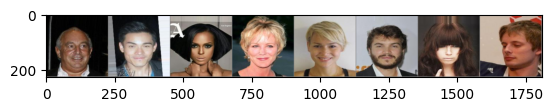

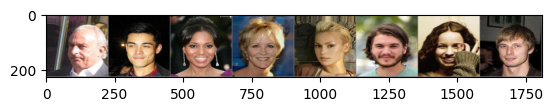

In [26]:
# Get some random training images
dataiter = iter(dataloader)
anchor, positive, negative = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(anchor))
imshow(torchvision.utils.make_grid(positive))